# Credit Card Fraud Detection

Aaron Weng, Michael Morrison

Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score
)
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt

# Load and clean the dataset
df = pd.read_csv('creditcard_2023.csv')
df = df.dropna()

# Stratified sampling for a balanced dataset
df_label_0 = df[df['Class'] == 0]
df_label_1 = df[df['Class'] == 1]
num_samples = int(len(df) * 0.1 / 2)  # 10% split equally between two labels
df_sample_0 = df_label_0.sample(n=num_samples, random_state=42)
df_sample_1 = df_label_1.sample(n=num_samples, random_state=42)
df_sample = pd.concat([df_sample_0, df_sample_1]).sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target variable
X = df_sample.drop(columns=['Class', 'id'])
y = df_sample['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Display the first few rows
print(df_sample.head())
print(df_sample.shape)

       id        V1        V2        V3        V4        V5        V6  \
0  181980  1.690526 -0.547917  0.136579 -0.620900  0.206980  0.235886   
1   10917  0.983236 -0.348393  0.756211 -0.237886  0.096724  0.004432   
2  268736  1.662911 -0.621454  0.064769 -0.589690  0.207970  0.315298   
3  275384  1.518134 -0.413118  0.556056  0.612441  0.178584  0.881137   
4   19226 -0.040321 -0.136214  1.228701 -0.728584  0.475459  0.203073   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.363502 -0.143406  0.742518  ... -0.266927 -1.177089  0.578388  1.355535   
1  0.366979 -0.166451  1.651055  ... -0.271137 -0.902514  0.214690  0.529952   
2  0.373160 -0.140452  1.194178  ... -0.145753 -0.272155  0.215459  1.478599   
3  0.245382 -0.087907  0.235579  ... -0.016014  0.566375  0.089432 -0.619333   
4  0.704564 -0.175390  0.265498  ... -0.211616 -0.619132 -0.004720 -0.766487   

        V25       V26       V27       V28    Amount  Class  
0 -1.313489 -0.0532

We can see that the dataset has 31 features and 568630 examples. After taking the 10% sample we still have 56863 rows to work with.

---



## Logistic Regression
We performed logistic regression on scaled features from the dataset using the built-in sklearn functions.

In [ ]:
# Logistic Regression
log_model = LogisticRegression(max_iter=3000, random_state=42)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_pred_proba = log_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, log_pred))


Logistic Regression Confusion Matrix:
 [[7841  214]
 [ 364 7511]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      8055
         1.0       0.97      0.95      0.96      7875

    accuracy                           0.96     15930
   macro avg       0.96      0.96      0.96     15930
weighted avg       0.96      0.96      0.96     15930



Most classification report measurements are at a 0.97, which is very good. The main problem is that the recall for label '1' is the lowest score at a 0.95. Recall is likely the most important measurement for testing a fraud detection model, and this recall score means that the model misses 1/20 fraud instances in testing.

## SVM
We trained a svm model on scaled features from the dataset using the built-in sklearn functions.

In [ ]:

# Support Vector Machine
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Evaluate SVM
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))


SVM Confusion Matrix:
 [[7970   85]
 [ 135 7740]]

SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      8055
         1.0       0.99      0.98      0.99      7875

    accuracy                           0.99     15930
   macro avg       0.99      0.99      0.99     15930
weighted avg       0.99      0.99      0.99     15930



## XGBoost
We trained a XGBoost random forest model on scaled features from the dataset using the built-in sklearn functions.

In [ ]:

# XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate XGBoost
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_pred))


XGBoost Confusion Matrix:
 [[8022   33]
 [   6 7869]]

XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8055
         1.0       1.00      1.00      1.00      7875

    accuracy                           1.00     15930
   macro avg       1.00      1.00      1.00     15930
weighted avg       1.00      1.00      1.00     15930



An incredible result, really. The model has a near 100% score in every single metric, showcasing the power of XGBoost as a predictor. This model only incorrectly predicted 39 items out of over 15000 tests!

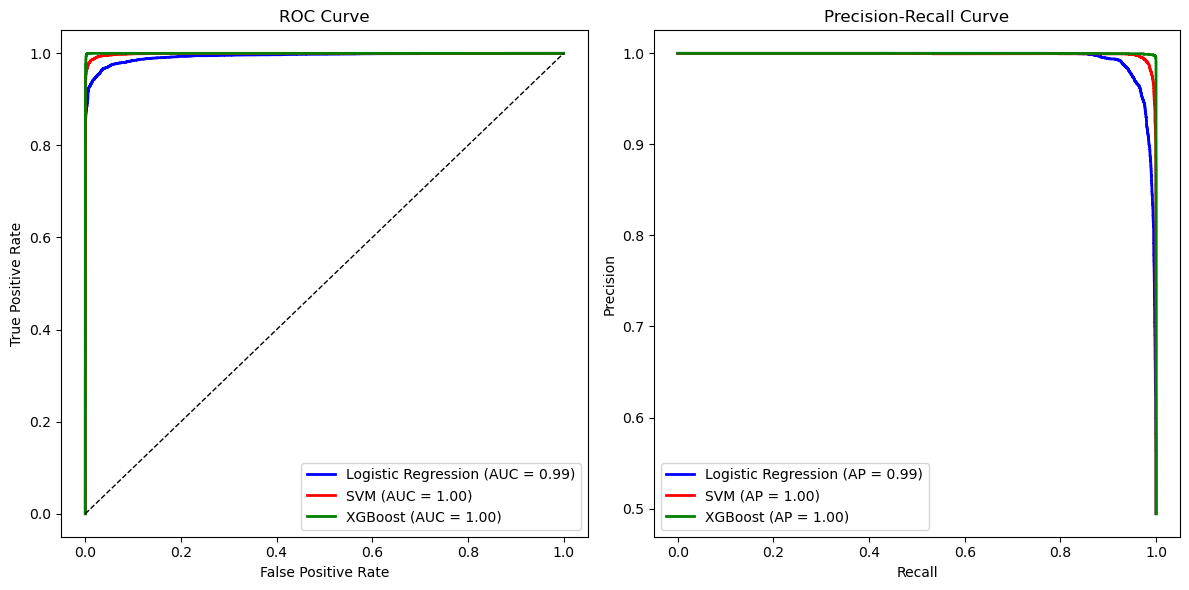

In [ ]:
# Evaluate Models for ROC and Precision-Recall
# ROC Curves
log_fpr, log_tpr, _ = roc_curve(y_test, log_pred_proba)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_pred_proba)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_pred_proba)

# AUC Scores
log_roc_auc = auc(log_fpr, log_tpr)
svm_roc_auc = auc(svm_fpr, svm_tpr)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Precision-Recall Curves
log_precision, log_recall, _ = precision_recall_curve(y_test, log_pred_proba)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_pred_proba)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_pred_proba)

# Average Precision Scores
log_ap_score = average_precision_score(y_test, log_pred_proba)
svm_ap_score = average_precision_score(y_test, svm_pred_proba)
xgb_ap_score = average_precision_score(y_test, xgb_pred_proba)

# Plotting
plt.figure(figsize=(12, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(log_fpr, log_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {log_roc_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, color='red', lw=2, label=f'SVM (AUC = {svm_roc_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='green', lw=2, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(log_recall, log_precision, color='blue', lw=2, label=f'Logistic Regression (AP = {log_ap_score:.2f})')
plt.plot(svm_recall, svm_precision, color='red', lw=2, label=f'SVM (AP = {svm_ap_score:.2f})')
plt.plot(xgb_recall, xgb_precision, color='green', lw=2, label=f'XGBoost (AP = {xgb_ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

Here are graphs combining all ROC and Precision-Recall curves of the models together. It more clearly illustrates the difference in strength between the three models before tuning. The XGBoost curve edges out the SVM curve, as it is almost a 90 degree angle for both graphs.

## Log Regression Tuning

Now we will tune the log regression model using different types of values for C. This is the regularization parameter that sets the strength we want the model to correct for mistakes. A lower C means that it is more lenient (potential underfitting) while a higher value means it is more strict (potential overfitting).

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Preprocessing
df = df.dropna()
X = df.drop(columns=['Class', 'id'])  # Drop 'Class' (target) and 'id' column
y = df['Class']  # Target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Define parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],       # Regularization strength
    'solver': ['lbfgs'],  # Solvers
    'penalty': ['l2'],       # Regularization types
    'max_iter': [3000]  # Iterations for convergence
}

# Initialize model and GridSearchCV
logreg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters and evaluate
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred = best_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 10, 'max_iter': 3000, 'penalty': 'l2', 'solver': 'lbfgs'}
Confusion Matrix:
 [[112688   1006]
 [  3051  42557]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    113694
         1.0       0.98      0.93      0.95     45608

    accuracy                           0.97    159302
   macro avg       0.98      0.96      0.97    159302
weighted avg       0.97      0.97      0.97    159302



The scores for log regression got significantly better

## SVM Tuning

For SVM, we will tune the C value and gamma. We already discussed what C does before, but gamma is different. Gamma is a parameter that controls the localization of singular data points. A higher gamma value means that the effect of significant data points are more localized, while a lower value means that they have more broad effects.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Randomly sample 10% of the dataset
df_sample = df.sample(frac=0.1, random_state=42)

# Separate features and target variable
X = df_sample.drop(columns=['Class', 'id'])  # Drop 'Class' (target) and 'id' column
y = df_sample['Class']  # Target variable (fraud or not)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Define parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],               # Regularization strength
    'kernel': ['rbf'],  # Kernel types
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf', 'poly'
}

# Initialize SVM model and GridSearchCV
svm = SVC(probability=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters and evaluate
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred = best_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Print the shape of the sampled data
print("Sampled data shape:", df_sample.shape)


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Confusion Matrix:
 [[11319    33]
 [   15  4563]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11352
         1.0       0.99      1.00      0.99      4578

    accuracy                           1.00     15930
   macro avg       1.00      1.00      1.00     15930
weighted avg       1.00      1.00      1.00     15930

Sampled data shape: (39825, 31)


## XGBoost Tuning

For XGBoost, we adjusted the n estimators (50, 100, 200), learning rate (0.01, 0.1, 0.2), and max depth (3, 5, 7).

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and target variable
X = df.drop(columns=['Class', 'id'])  # Drop 'Class' (target) and 'id' column
y = df['Class']  # Target variable (fraud or not)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'max_depth': [3, 5, 7],                 # Maximum depth of trees
    'subsample': [1.0],                # Fraction of samples used per tree
    'colsample_bytree': [1.0],         # Fraction of features used per tree
    'gamma': [1]                      # Minimum loss reduction for a split
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the best model on the full training set
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the tuned model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Confusion Matrix:
 [[113631     63]
 [     7  45601]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    113694
         1.0       1.00      1.00      1.00     45608

    accuracy                           1.00    159302
   macro avg       1.00      1.00      1.00    159302
weighted avg       1.00      1.00      1.00    159302



We found in testing that the best combination was n\_estimators=100, learning\_rate=0.2, and max\_depth=7. Looks like our tuning resulted in a model that performs slightly worse than the original, untuned XGBoost model.

In [ ]:
# Logistic Regression
log_model = LogisticRegression(C=10, max_iter=3000,penalty='l2', solver='lbfgs', random_state=42)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_pred_proba = log_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, log_pred))


Logistic Regression Confusion Matrix:
 [[7836  219]
 [ 359 7516]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      8055
         1.0       0.97      0.95      0.96      7875

    accuracy                           0.96     15930
   macro avg       0.96      0.96      0.96     15930
weighted avg       0.96      0.96      0.96     15930



In [ ]:
# Support Vector Machine
svm_model = SVC(kernel='rbf', gamma=.1, C=10, probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Evaluate SVM
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))


SVM Confusion Matrix:
 [[8021   34]
 [   2 7873]]

SVM Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8055
         1.0       1.00      1.00      1.00      7875

    accuracy                           1.00     15930
   macro avg       1.00      1.00      1.00     15930
weighted avg       1.00      1.00      1.00     15930



In [ ]:
# XGBoost
xgb_model = xgb.XGBClassifier(colsample_bytree=1.0, gamma=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate XGBoost
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_pred))


XGBoost Confusion Matrix:
 [[8023   32]
 [  26 7849]]

XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8055
         1.0       1.00      1.00      1.00      7875

    accuracy                           1.00     15930
   macro avg       1.00      1.00      1.00     15930
weighted avg       1.00      1.00      1.00     15930



Here, we create a combined graph for all of the models with their tuned hyperparameters. Each of the three models have been retrained in the lines above with their new best parameters. We want to find out which model performs best now that they have been properly tuned.

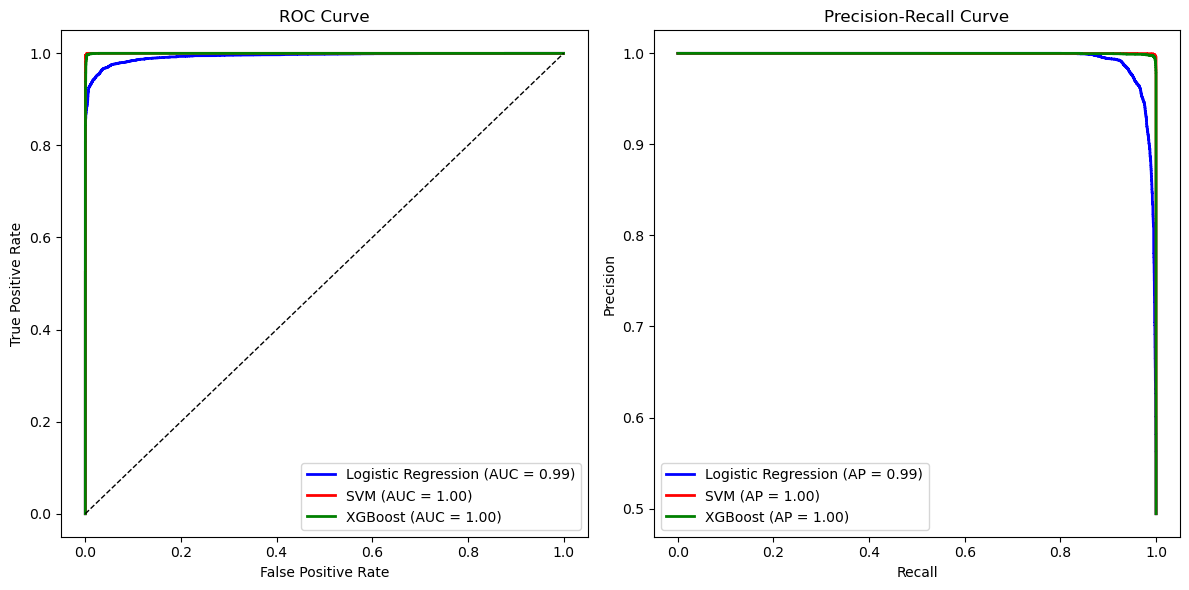

In [ ]:
# Evaluate Models for ROC and Precision-Recall
# ROC Curves
log_fpr, log_tpr, _ = roc_curve(y_test, log_pred_proba)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_pred_proba)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_pred_proba)

# AUC Scores
log_roc_auc = auc(log_fpr, log_tpr)
svm_roc_auc = auc(svm_fpr, svm_tpr)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Precision-Recall Curves
log_precision, log_recall, _ = precision_recall_curve(y_test, log_pred_proba)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_pred_proba)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_pred_proba)

# Average Precision Scores
log_ap_score = average_precision_score(y_test, log_pred_proba)
svm_ap_score = average_precision_score(y_test, svm_pred_proba)
xgb_ap_score = average_precision_score(y_test, xgb_pred_proba)

# Plotting
plt.figure(figsize=(12, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(log_fpr, log_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {log_roc_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, color='red', lw=2, label=f'SVM (AUC = {svm_roc_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='green', lw=2, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(log_recall, log_precision, color='blue', lw=2, label=f'Logistic Regression (AP = {log_ap_score:.2f})')
plt.plot(svm_recall, svm_precision, color='red', lw=2, label=f'SVM (AP = {svm_ap_score:.2f})')
plt.plot(xgb_recall, xgb_precision, color='green', lw=2, label=f'XGBoost (AP = {xgb_ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

Surprisingly, from the graphs we can see, SVM now barely edges out XGBoost when it comes to overall area under the curve. It is more right-angle-like than XGBoost by a slight margin.